In [18]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from adtk.data import validate_series
%matplotlib inline
plt.rcParams.update({'font.size': 12})



In [19]:
filename = '/Users/gabriel/Desktop/DATA-LASP/frd_dmin.nc'
dataset = nc.Dataset(filename)



In [20]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)
type(df)


pandas.core.frame.DataFrame

In [21]:
df['Time_Diff'] = df['Time'].diff()
df['Time_Diff'].max()

Timedelta('0 days 00:01:00')

In [22]:
print(df)

                        Time             X            Y        Z  \
0        1982-11-11 16:40:00  20259.346679 -3091.069485  51083.4   
1        1982-11-11 16:41:00  20259.247824 -3091.054402  51083.3   
2        1982-11-11 16:42:00  20260.443022 -3091.839834  51083.2   
3        1982-11-11 16:43:00  20260.335239 -3091.220314  51083.1   
4        1982-11-11 16:44:00  20260.524007 -3090.646044  51082.9   
...                      ...           ...          ...      ...   
17955795 2016-12-31 23:55:00  21071.000000 -3926.500000  46418.7   
17955796 2016-12-31 23:56:00  21071.400000 -3926.700000  46418.6   
17955797 2016-12-31 23:57:00  21072.600000 -3926.900000  46418.3   
17955798 2016-12-31 23:58:00  21073.000000 -3927.300000  46418.3   
17955799 2016-12-31 23:59:00  21073.000000 -3927.400000  46418.3   

               Time_Diff  
0                    NaT  
1        0 days 00:01:00  
2        0 days 00:01:00  
3        0 days 00:01:00  
4        0 days 00:01:00  
...                  

In [31]:
df.between_time(df['X'](1),df['X'](2016, 12,31))['Y'].std()

TypeError: 'Series' object is not callable

In [5]:

#plt.plot(df['Time'], df['X'], label='data', color='blue')
#plt.xlabel('Time')
#plt.ylabel('X-component of magnetic field')


#plt.xlim([datetime.date(1989, 3, 10), datetime.date(1989, 3, 17)])
#plt.xticks(rotation=120)
#plt.legend()



In [6]:
rmean = df['X'].rolling(50).mean()
rstd = df['X'].rolling(50).std(ddof=1)
ymean = df['Y'].rolling(50).mean()
ystd = df['Y'].rolling(50).std()

In [7]:
#plt.plot(df['Time'], df['X'], label='data', color='blue')
#plt.plot(df['Time'], rmean, color='red', label='Rolling mean')
#plt.plot(df['Time'], rstd, color='orange', label='Standard Deviation')
#plt.xlabel('Time')
#plt.ylabel('X-component of magnetic field')

#plt.xlim([datetime.datetime(2000, 7, 15, 18), datetime.datetime(2000, 7, 16, 00)])
#plt.xticks(rotation=120)
#plt.legend()


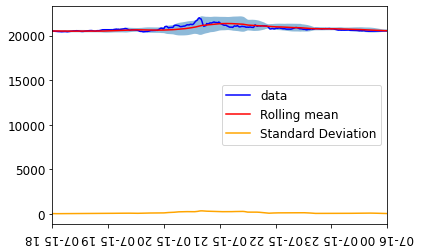

In [11]:
#plt.plot(df['Time'], df['X'], label='data', color='blue')
#plt.plot(df['Time'], rmean, color='red', label='Rolling mean')
#plt.plot(df['Time'], rstd, color='orange', label='Standard Deviation')
#plt.fill_between(df['Time'], rmean-3*rstd, rmean+3*rstd, alpha=0.5)
#plt.xlim([datetime.datetime(2000, 7, 15, 18), datetime.datetime(2000, 7, 16, 00)])
#plt.xticks(rotation=180)
#plt.legend()
#plt.show()

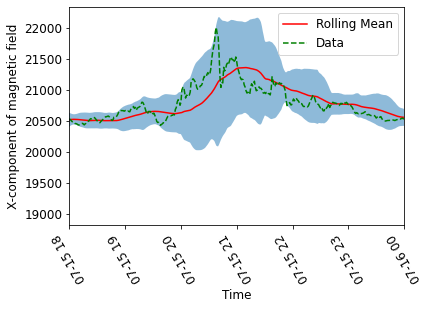

In [9]:
#plt.plot(df['Time'], rmean, label='Rolling Mean', color='red')
#plt.plot(df['Time'], df['X'], label='Data', color='green', linestyle='dashed')
#plt.plot(df['Time'], ymean, color='orange')
#plt.plot(df['Time'], rstd, color='green')
#plt.plot(df['X'], ystd, color='yellow')
#plt.fill_between(df['Time'], ymean-ystd, ymean+ystd, alpha=0.5)
#plt.fill_between(df['Time'], rmean-3*rstd, rmean+3*rstd, alpha=0.5)

#plt.xlabel('Time')
#plt.ylabel('X-component of magnetic field')

#plt.xlim([datetime.datetime(2000, 7, 1), datetime.datetime(2000, 7, 30)])
#plt.xlim([datetime.datetime(2000, 7, 15, 18), datetime.datetime(2000, 7, 16, 00)])
#plt.xticks(rotation=120)
#plt.legend()

In [13]:
df.head()

,Time,X,Y,Z,Time_Diff
0,1982-11-11 16:40:00,20259.346679,-3091.069485,51083.4,NaT
1,1982-11-11 16:41:00,20259.247824,-3091.054402,51083.3,0 days 00:01:00
2,1982-11-11 16:42:00,20260.443022,-3091.839834,51083.2,0 days 00:01:00
3,1982-11-11 16:43:00,20260.335239,-3091.220314,51083.1,0 days 00:01:00
4,1982-11-11 16:44:00,20260.524007,-3090.646044,51082.9,0 days 00:01:00
